---
# KMeans Clustering - Model 1
---
In this notebook, we will be using the KMeans clustering algorithm to create clusters to regroup food with similar Environmental Footprint Score.

At first the KMeans clustering algorithm will be used on the complete dataset. Howerver, the resulst is 60 to 90 clusters and it does not regroup the food by EF Score, but mostly bu Food Subcategory.

In a way to reduced the quantity of cluster produced by the KMeans algorithm, we will be applying KMeans over a subset of data. We will be able to access whether this helps to cluster to regroup food by EF Score or not.

**Results**

Using a reduced subset of dataset greatly improve the ability of the clustering algrithm to capture the key element on which to regroup the food, which is the EF Score.

---

### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

### Read data file

**Read Cleaned + Feature Engineered File**

In [2]:
df = pd.read_excel('../data/AGRIBALYSE3.2_Synthese_cleaned_featEng.xlsx')
df

,Season Code,Airplane Code,EF Score,Climate Change,Ozone Layer Depletion,Ionizing Radiation,Photochemical Ozone Formation,Fine Particles,Toxicological Effects (Non-carcinogenic),Toxicological Effects (Carcinogenic),...,Delivery_Ambiant (long),Delivery_Ambiant (moyen),Delivery_Congelé,Delivery_Glacé,Packaging_PACK PROXY,Preparation_Four,Preparation_Micro-onde,Preparation_Pas de préparation,Preparation_Poêle,Preparation_Réfrigéré chez le consommateur
0,2,0,1.874152,7.584518,2.932471e-07,30.251469,0.025011,4.738923e-07,2.087261e-07,6.622400e-09,...,1,0,0,0,1,0,0,1,0,0
1,2,0,0.148315,0.940414,2.703735e-08,0.558035,0.003928,7.864125e-08,4.238290e-08,8.815249e-10,...,1,0,0,0,1,0,0,1,0,0
2,2,0,0.147701,1.174072,3.382798e-08,0.545093,0.004025,6.420649e-08,2.658238e-08,2.141891e-09,...,1,0,0,0,1,0,0,1,0,0
3,2,0,1.547348,11.786920,6.270593e-07,11.185511,0.051406,8.615935e-07,9.852629e-08,6.933245e-09,...,1,0,0,0,1,0,0,1,0,0
4,2,0,1.547348,11.786920,6.270593e-07,11.185511,0.051406,8.615935e-07,9.852629e-08,6.933245e-09,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,2,0,2.744841,29.685425,3.465597e-07,2.183183,0.052400,2.364050e-06,3.273358e-07,1.520520e-08,...,0,0,0,1,0,0,0,0,0,0
2447,2,0,2.719832,29.389500,3.360531e-07,1.988039,0.051666,2.357969e-06,3.246593e-07,1.515039e-08,...,0,0,0,1,0,0,0,0,1,0
2448,2,0,2.738488,29.350392,3.342279e-07,2.401715,0.051710,2.361347e-06,3.275382e-07,1.515673e-08,...,0,0,0,1,0,1,0,0,0,0
2449,2,0,3.418940,36.767887,4.171038e-07,2.867791,0.064661,2.950918e-06,4.093391e-07,1.894341e-08,...,0,0,0,1,0,1,0,0,0,0


**Read Cleaned File**

In [3]:
df_o = pd.read_excel('../data/AGRIBALYSE3.2_Synthese_cleaned.xlsx')
df_o

,Food Group,Food Sub-group,LCI Name,Season Code,Airplane Code,Delivery,Packaging,Preparation,EF Score,Climate Change,...,Marine Eutrophication,Terrestrial Eutrophication,Ecotoxicity for Freshwater Aquatic Ecosystems,Land Use,Water Resource Depletion,Energy Resource Depletion,Mineral Resource Depletion,Climate Change - Biogenic Emissions,Climate Change - Fossil Emissions,Climate Change - Emissions from Land Use Change
0,aides culinaires et ingrédients divers,aides culinaires,"Aromatic stock cube, for fish, dehydrated",2,0,Ambiant (long),PACK PROXY,Pas de préparation,1.874152,7.584518,...,0.026783,0.137099,70.183757,106.309500,3.380742,700.159580,0.000051,0.103694,7.459628,0.021197
1,aides culinaires et ingrédients divers,aides culinaires,Topping sauce for pizza,2,0,Ambiant (long),PACK PROXY,Pas de préparation,0.148315,0.940414,...,0.004162,0.030263,11.027442,67.673943,2.468103,24.405351,0.000006,0.033626,1.015114,-0.108325
2,aides culinaires et ingrédients divers,aides culinaires,"Soy ""cream"" preparation",2,0,Ambiant (long),PACK PROXY,Pas de préparation,0.147701,1.174072,...,0.007233,0.024434,30.835753,116.492280,0.422468,22.429809,0.000004,0.025180,0.964544,0.184348
3,aides culinaires et ingrédients divers,algues,"Seaweed, agar, raw",2,0,Ambiant (long),PACK PROXY,Pas de préparation,1.547348,11.786920,...,0.015034,0.143648,57.867520,26.718351,4.833158,395.946390,0.000079,0.040063,11.740311,0.006545
4,aides culinaires et ingrédients divers,algues,"Sea lettuce (Enteromorpha sp.), dried or dehyd...",2,0,Ambiant (long),PACK PROXY,Pas de préparation,1.547348,11.786920,...,0.015034,0.143648,57.867520,26.718351,4.833158,395.946390,0.000079,0.040063,11.740311,0.006545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,"viandes, œufs, poissons",viandes cuites,"Veal, knuckle or shank, braised or boiled",2,0,Glacé,PACK AGB,Cuisson à l'eau,2.744841,29.685425,...,0.091173,1.457487,391.691640,1336.417000,4.021206,149.244380,0.000057,15.861507,11.205989,2.617929
2447,"viandes, œufs, poissons",viandes cuites,"Veal, tenderloin, grilled/pan-fried",2,0,Glacé,PACK AGB,Poêle,2.719832,29.389500,...,0.091187,1.457302,392.319170,1339.161800,3.972692,141.891310,0.000056,15.821821,10.946006,2.621672
2448,"viandes, œufs, poissons",viandes cuites,"Veal, tenderloin, roasted",2,0,Glacé,PACK AGB,Four,2.738488,29.350392,...,0.091077,1.457291,392.244620,1336.137200,3.991295,149.677240,0.000059,15.821740,10.910768,2.617884
2449,"viandes, œufs, poissons",viandes cuites,"Veal, roast, cooked",2,0,Glacé,PACK AGB,Four,3.418940,36.767887,...,0.113935,1.821645,490.596670,1670.079500,4.984198,184.179660,0.000072,19.864699,13.630845,3.272343


---

<center>
    
## Preparing data

</center>

---

### Separate X and y features

In [176]:
# Seperate X and y features
X = df.drop(columns=['EF Score','Climate Change'])
y = df['EF Score']

# Columns to keep for subset X
cols=[ 
       #'Ozone Layer Depletion',
       #'Ionizing Radiation',
       'Photochemical Ozone Formation', 
       'Fine Particles',
       'Toxicological Effects (Non-carcinogenic)',
       'Toxicological Effects (Carcinogenic)',
       #'Terrestrial and Freshwater Acidification', 
       'Freshwater Eutrophication',
       'Marine Eutrophication', 
       #'Terrestrial Eutrophication',
       'Ecotoxicity for Freshwater Aquatic Ecosystems',
       'Land Use',
       'Water Resource Depletion', 
       'Energy Resource Depletion',
       'Mineral Resource Depletion',
       'Climate Change'
       #'Climate Change - Biogenic Emissions',
       #'Climate Change - Fossil Emissions',
       #'Climate Change - Emissions from Land Use Change'
     ]

# Create X subset
X_sub = df[cols].copy()

# Creating a new column combining both Toxicological Effects
X_sub['Toxicological Effects'] = X_sub[['Toxicological Effects (Non-carcinogenic)', 'Toxicological Effects (Carcinogenic)']].sum(axis=1)

# Creating a new column combining both Eutrophication
X_sub['Water Eutrophication'] = X_sub[['Freshwater Eutrophication', 'Marine Eutrophication', ]].sum(axis=1)

# Removing unneccessary columns
X_sub = X_sub.drop(columns=['Toxicological Effects (Non-carcinogenic)',
                            'Toxicological Effects (Carcinogenic)',
                            'Freshwater Eutrophication',
                            'Marine Eutrophication'])

### Scale X features

In [177]:
# Create instance of scaler
scaler = StandardScaler()

# Scale the data
X_scaled = scaler.fit_transform(X)

# Scale X subset
X_sub_scaled = scaler.fit_transform(X_sub)

---

<center>
    
## Find best optimal K value

</center>

---

**Elbow plot**

In [6]:
# List to store the sum of squared distances (inertia) for each K
ssd = []  

# Testing K values from 2 to 70
for k in range(2, 100):  
    kmeans = KMeans(n_clusters=k, random_state=5)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

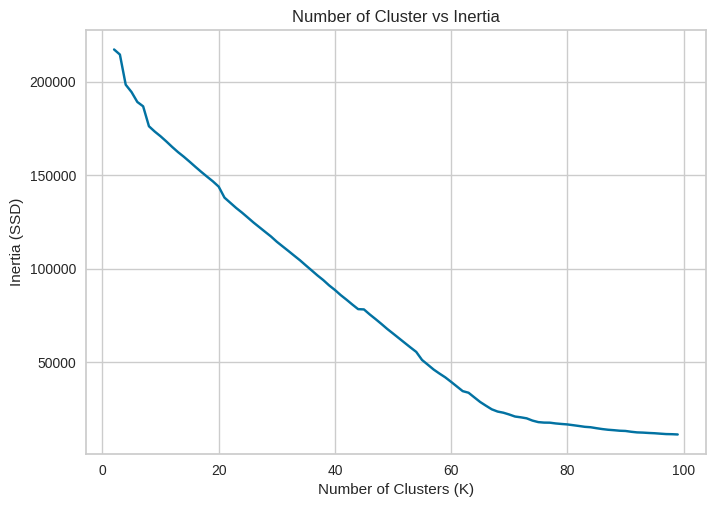

In [7]:
# Plot the elbow graph
plt.plot(range(2, 100), ssd)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSD)')
plt.title('Number of Cluster vs Inertia')
plt.show()

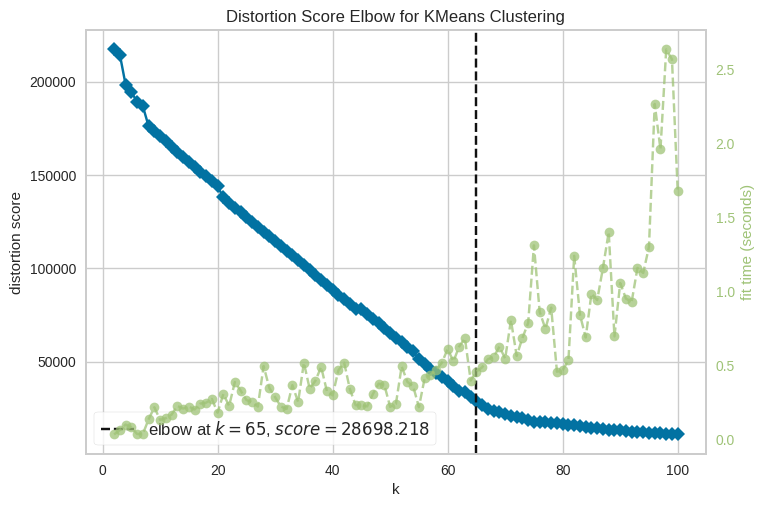

In [8]:
# Create the Elbow Visualizer for max number of 10 clusters
Elbow_M = KElbowVisualizer(KMeans(random_state=5), k=100)
Elbow_M.fit(X_scaled)  # fit on PCA transformed data
Elbow_M.show();

**Elbow plot (k from 70 to 100)**

In [9]:
# List to store the sum of squared distances (inertia) for each K
ssd = []  

# Testing K values from 2 to 70
for k in range(70, 120):  
    kmeans = KMeans(n_clusters=k, random_state=5)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

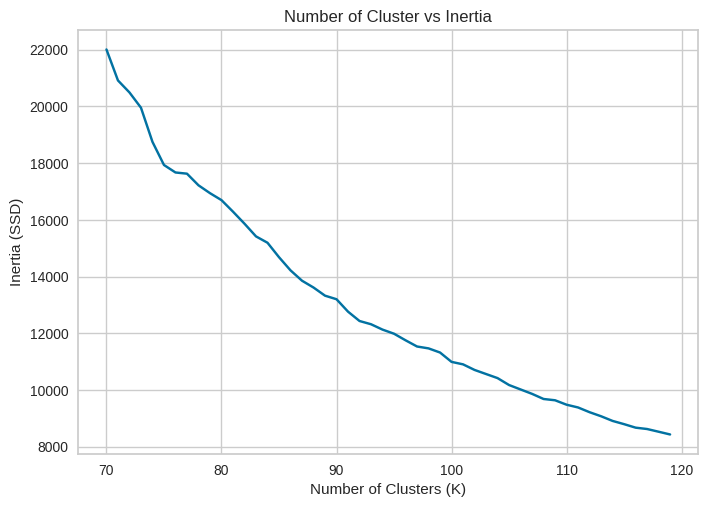

In [10]:
# Plot the elbow graph
plt.plot(range(70, 120), ssd)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSD)')
plt.title('Number of Cluster vs Inertia')
plt.show()

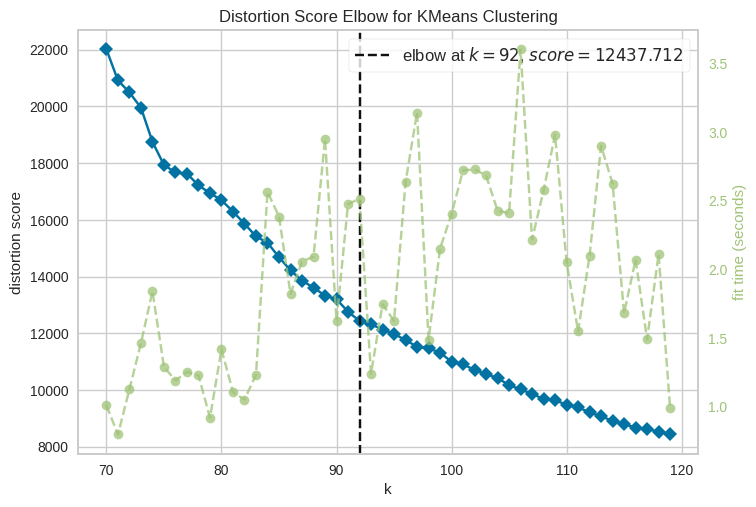

In [11]:
# Create the Elbow Visualizer for max number of 10 clusters
Elbow_M = KElbowVisualizer(KMeans(random_state=5), k=(70,120))

Elbow_M.fit(X_scaled)  # fit on PCA transformed data
Elbow_M.show();

---

<center>
    
## KMeans Model

</center>

---

---
### Creating a KMeans model with 60 clusters

---

**Create intance of model**

In [12]:
kmeans = KMeans(n_clusters=60, random_state=5)

**Fit the model on the dataset**

In [13]:
kmeans.fit(X_scaled)

KMeans(n_clusters=60, random_state=5)

---
### Evaluate the value K=60 for number of cluster

---

**Add Cluster labels to the cleaned dataframe**

In [14]:
df_o['label'] = kmeans.labels_

df_o['label_str'] = kmeans.labels_.astype(str)

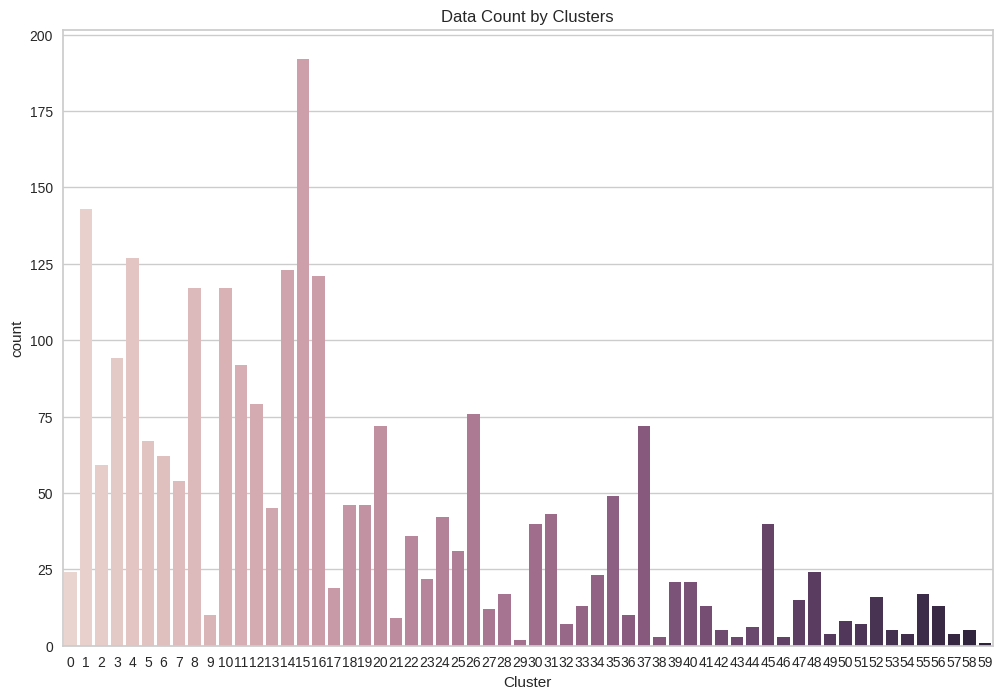

In [15]:
# Create figure and adjust size
plt.figure(figsize=(12,8))

# Create count plot
ax = sns.countplot(x=df_o['label'], hue=df_o['label'], legend=False)

# Add title
ax.set_title('Data Count by Clusters')

# Add axis labels
ax.set_xlabel('Cluster')

# Show plot
plt.show()

/tmp/ipykernel_3584329/83504249.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 60)
/tmp/ipykernel_3584329/83504249.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 60 * 5)  # Sample from a wider range


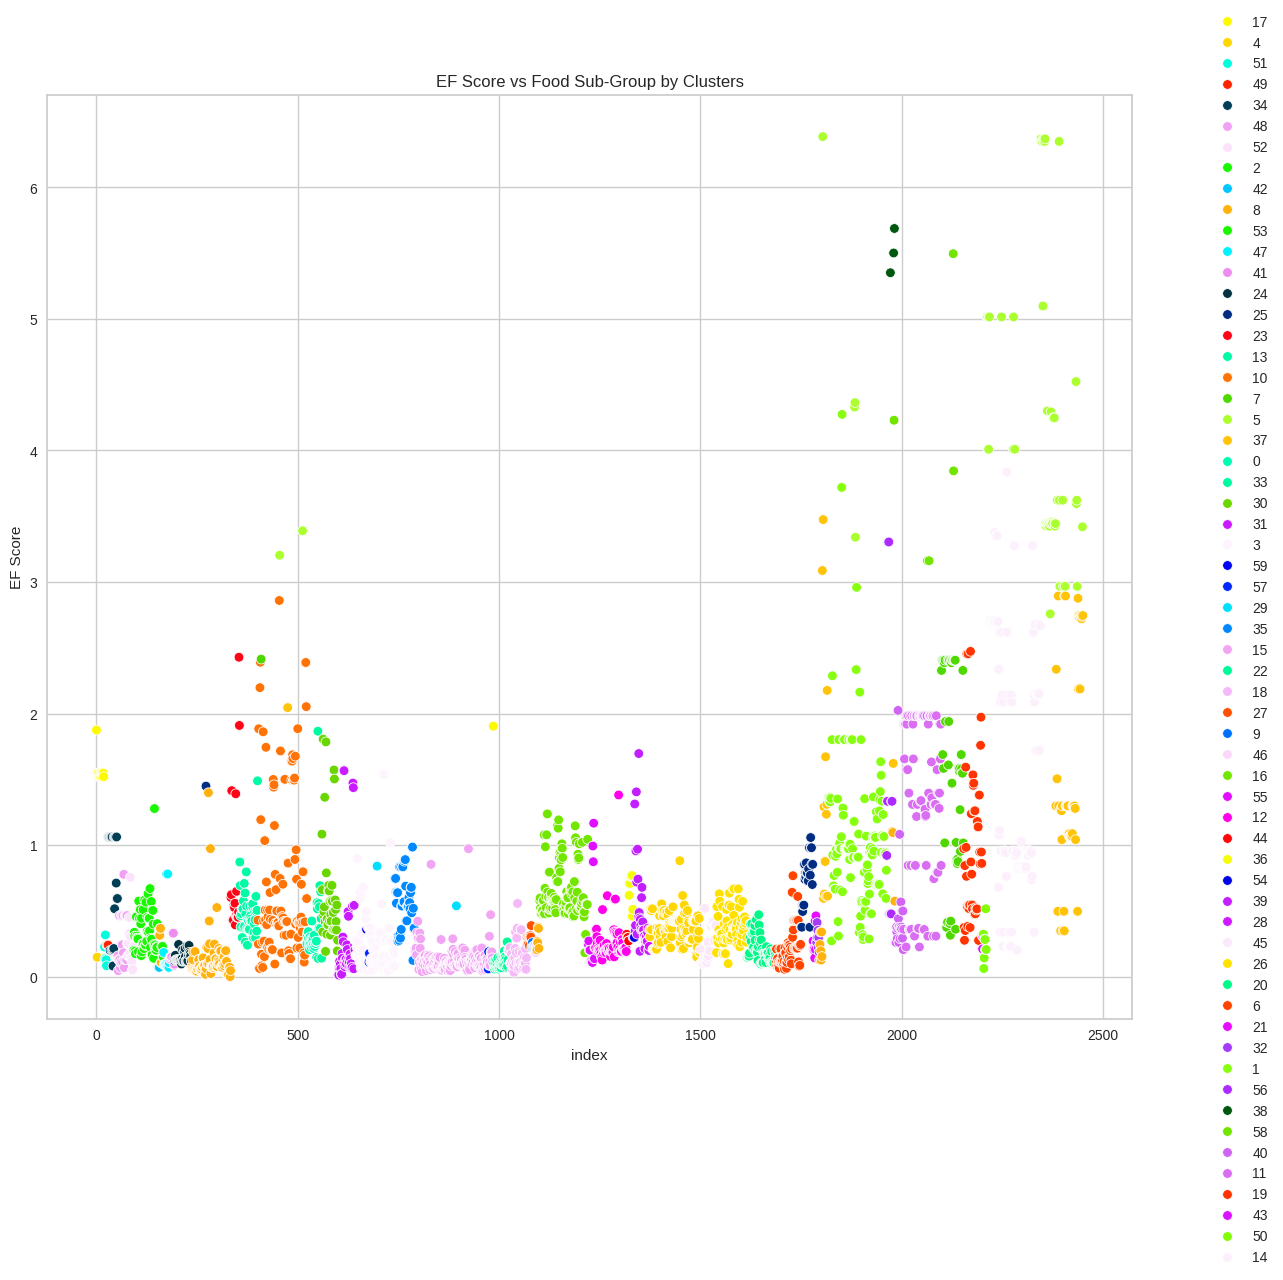

In [16]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 60) 
palette = [cmap(i) for i in range(60)]

cmap = plt.cm.get_cmap("gist_ncar", 60 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 60, replace=False) 
palette = [cmap(i) for i in indices]


# Create count plot
ax = sns.scatterplot(df_o, x=df_o.index, y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('index')
ax.set_ylabel('EF Score')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_3584329/316389407.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 60)
/tmp/ipykernel_3584329/316389407.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 60 * 5)  # Sample from a wider range
/tmp/ipykernel_3584329/316389407.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)


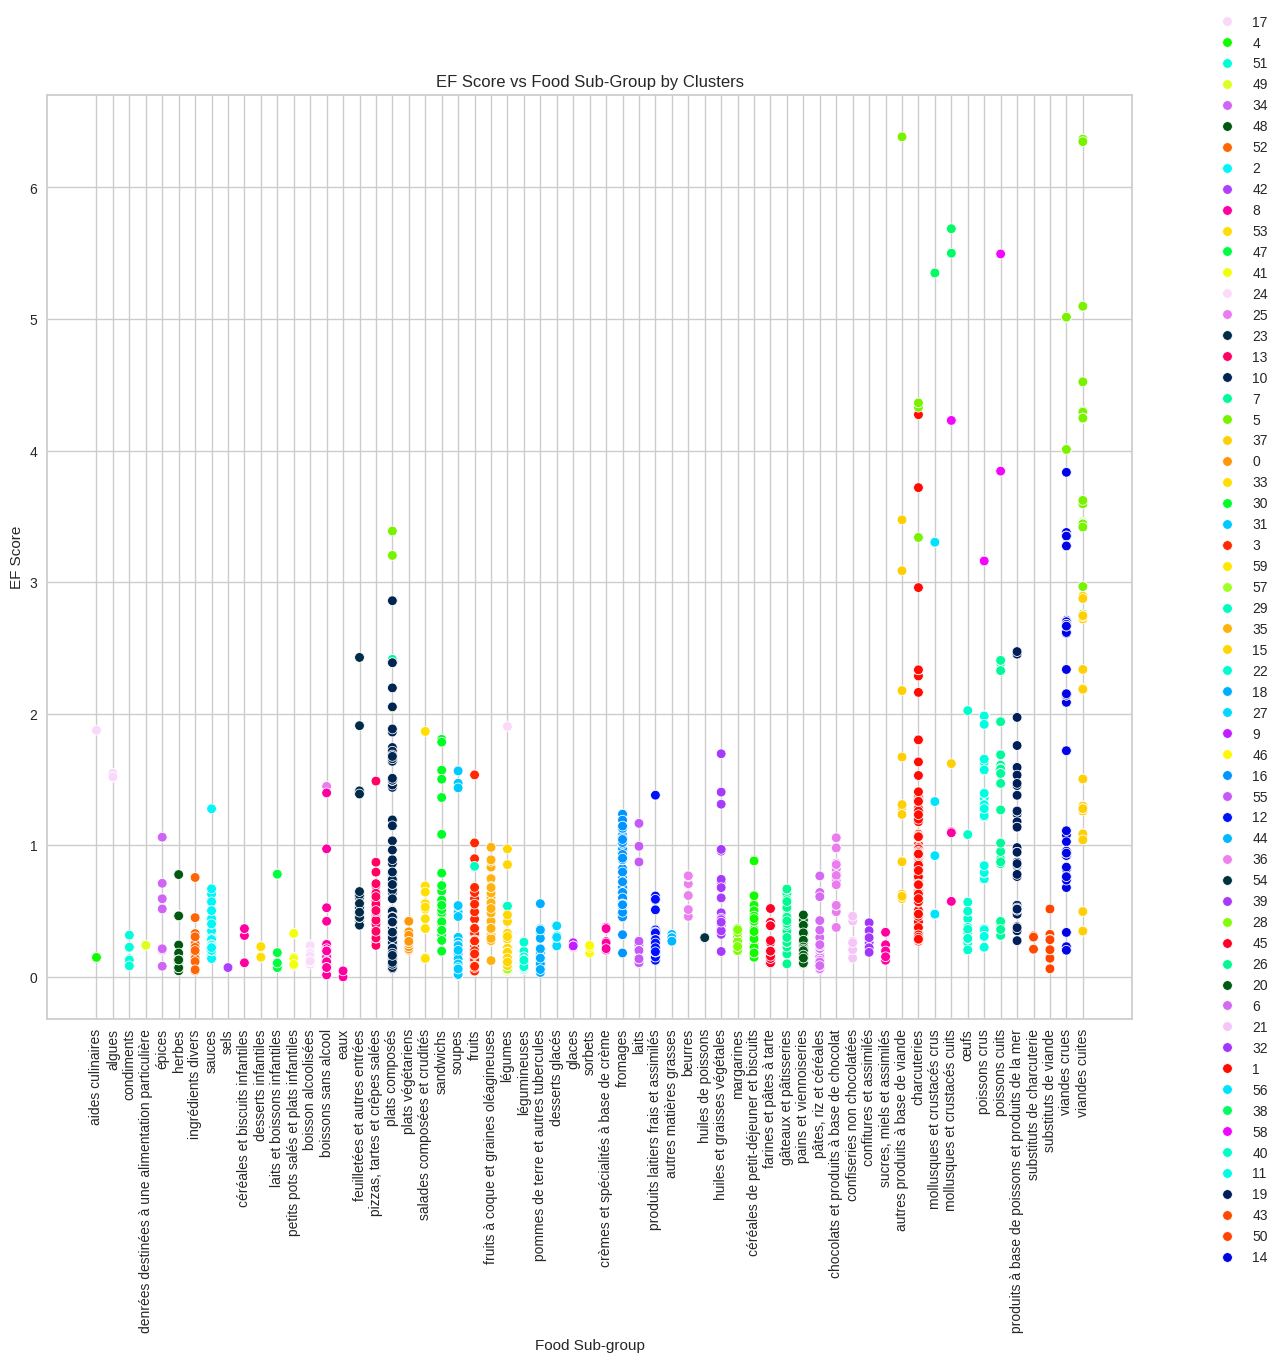

In [17]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 60) 
palette = [cmap(i) for i in range(60)]


cmap = plt.cm.get_cmap("gist_ncar", 60 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 60, replace=False) 
palette = [cmap(i) for i in indices]


# Create count plot
ax = sns.scatterplot(df_o, x='Food Sub-group', y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('Food Sub-group')
ax.set_ylabel('EF Score')

#
ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


---
### Creating a KMeans model with 80 clusters

---

**Create intance of model**

In [18]:
kmeans = KMeans(n_clusters=80, random_state=5)

**Fit the model on the dataset**

In [19]:
kmeans.fit(X_scaled)

KMeans(n_clusters=80, random_state=5)

---
### Evaluate the value K=80 for number of cluster

---

**Add Cluster labels to the cleaned dataframe**

In [20]:
df_o['label'] = kmeans.labels_

df_o['label_str'] = kmeans.labels_.astype(str)

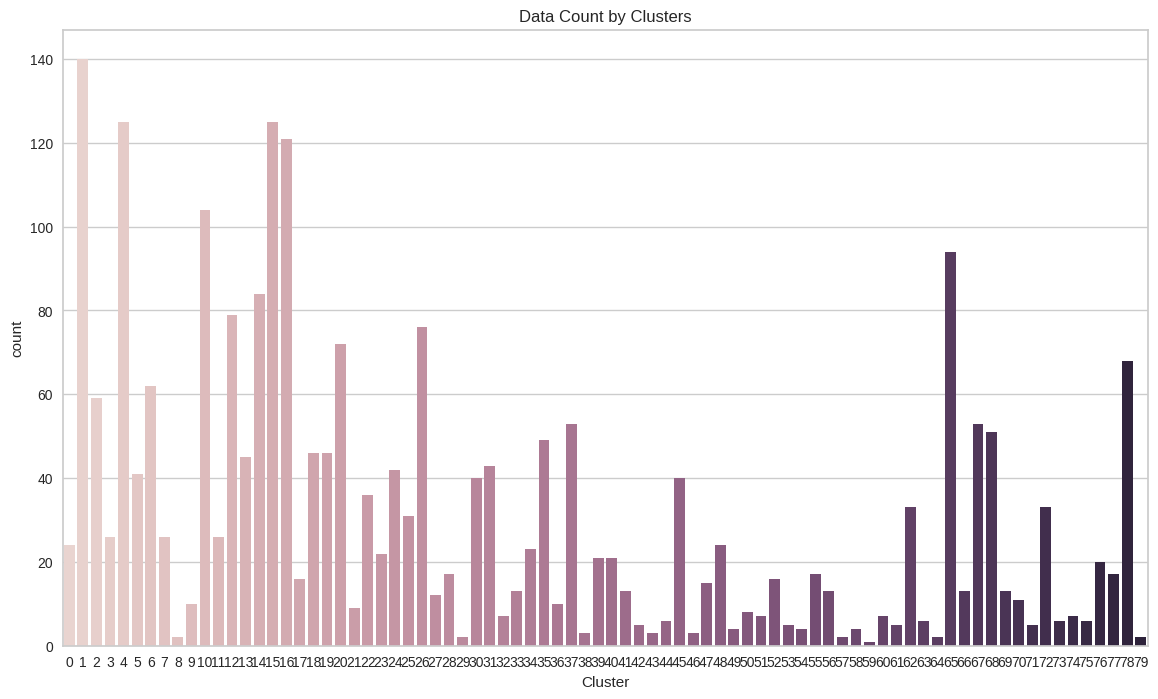

In [21]:
# Create figure and adjust size
plt.figure(figsize=(14,8))

# Create count plot
ax = sns.countplot(x=df_o['label'], hue=df_o['label'], legend=False)

# Add title
ax.set_title('Data Count by Clusters')

# Add axis labels
ax.set_xlabel('Cluster')

# Show plot
plt.show()

/tmp/ipykernel_3584329/1891239328.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 80)
/tmp/ipykernel_3584329/1891239328.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 80 * 5)  # Sample from a wider range


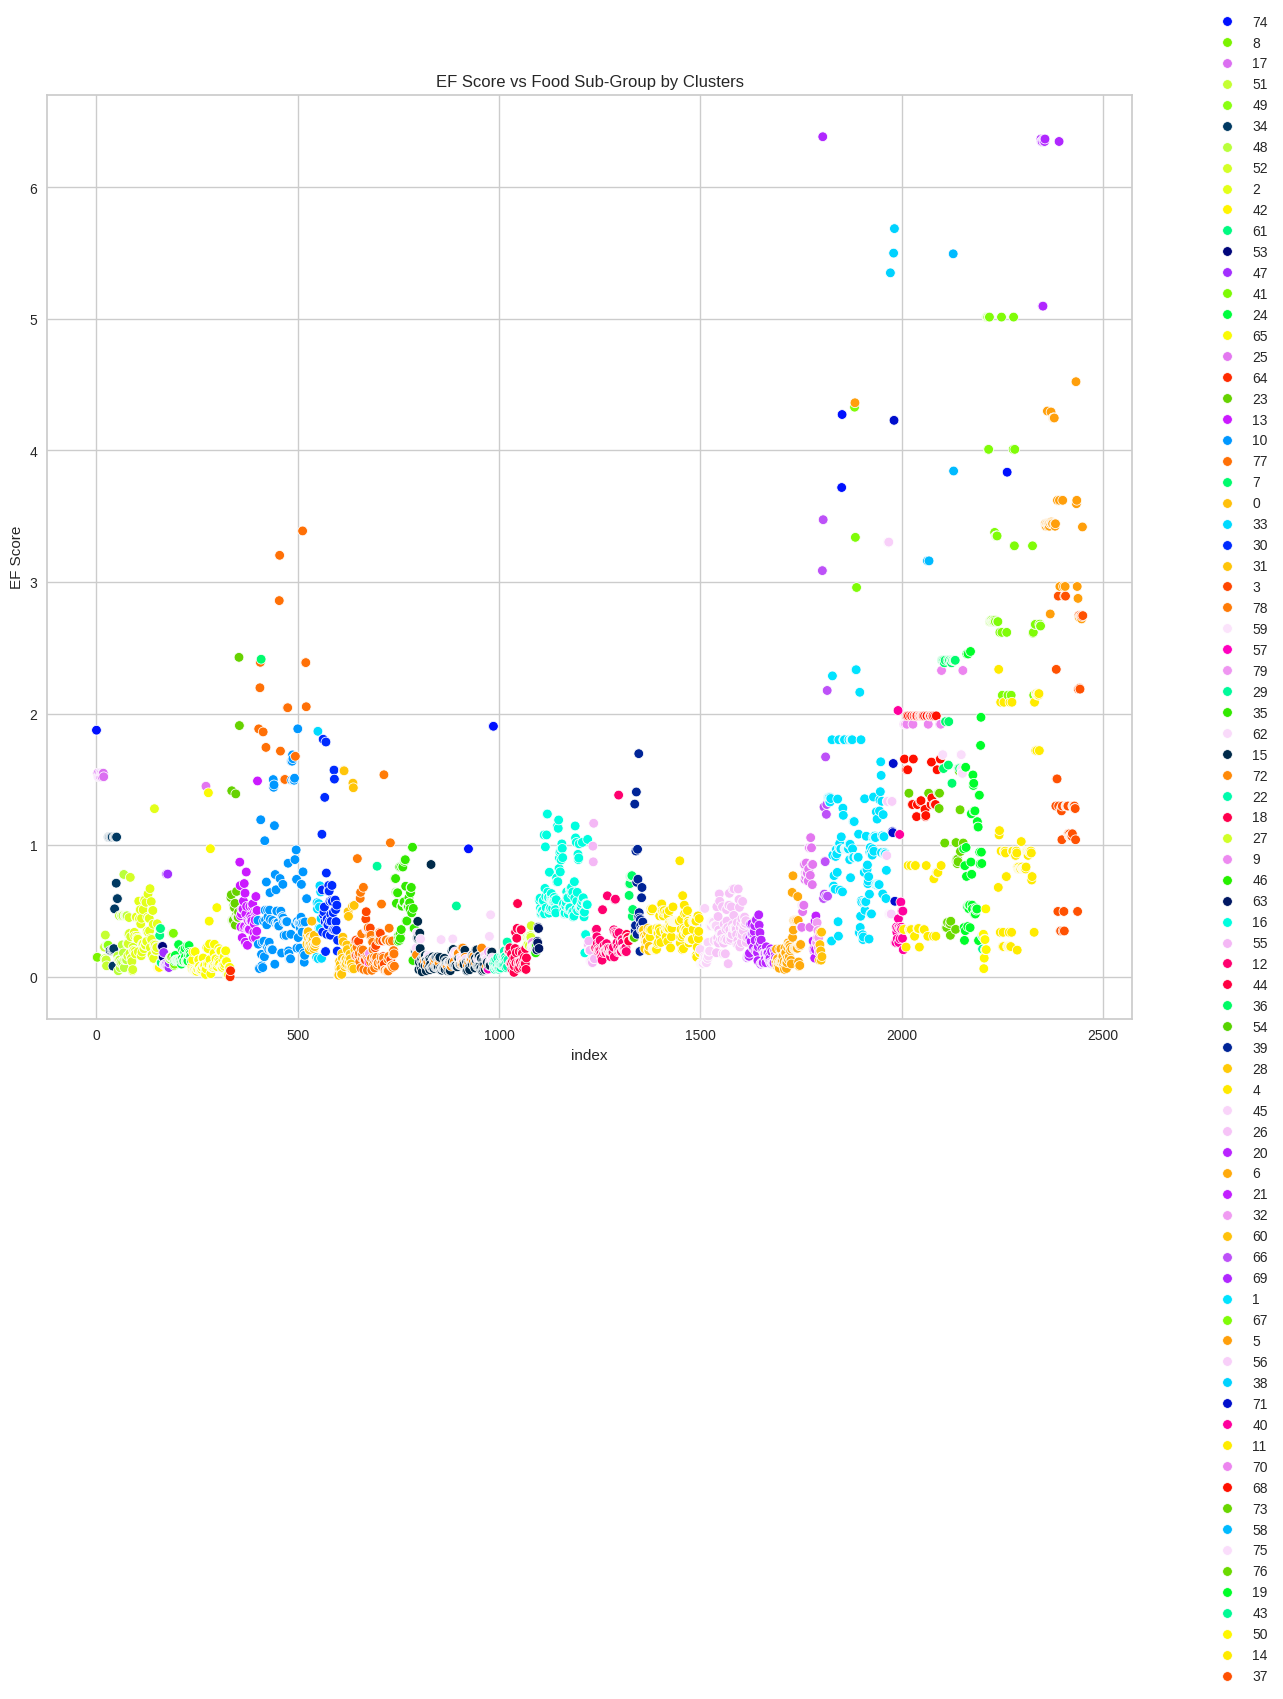

In [22]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 80) 
palette = [cmap(i) for i in range(80)]

cmap = plt.cm.get_cmap("gist_ncar", 80 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 80, replace=False) 
palette = [cmap(i) for i in indices]


# Create count plot
ax = sns.scatterplot(df_o, x=df_o.index, y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('index')
ax.set_ylabel('EF Score')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_3584329/183826753.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 80)
/tmp/ipykernel_3584329/183826753.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 80 * 5)  # Sample from a wider range
/tmp/ipykernel_3584329/183826753.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)


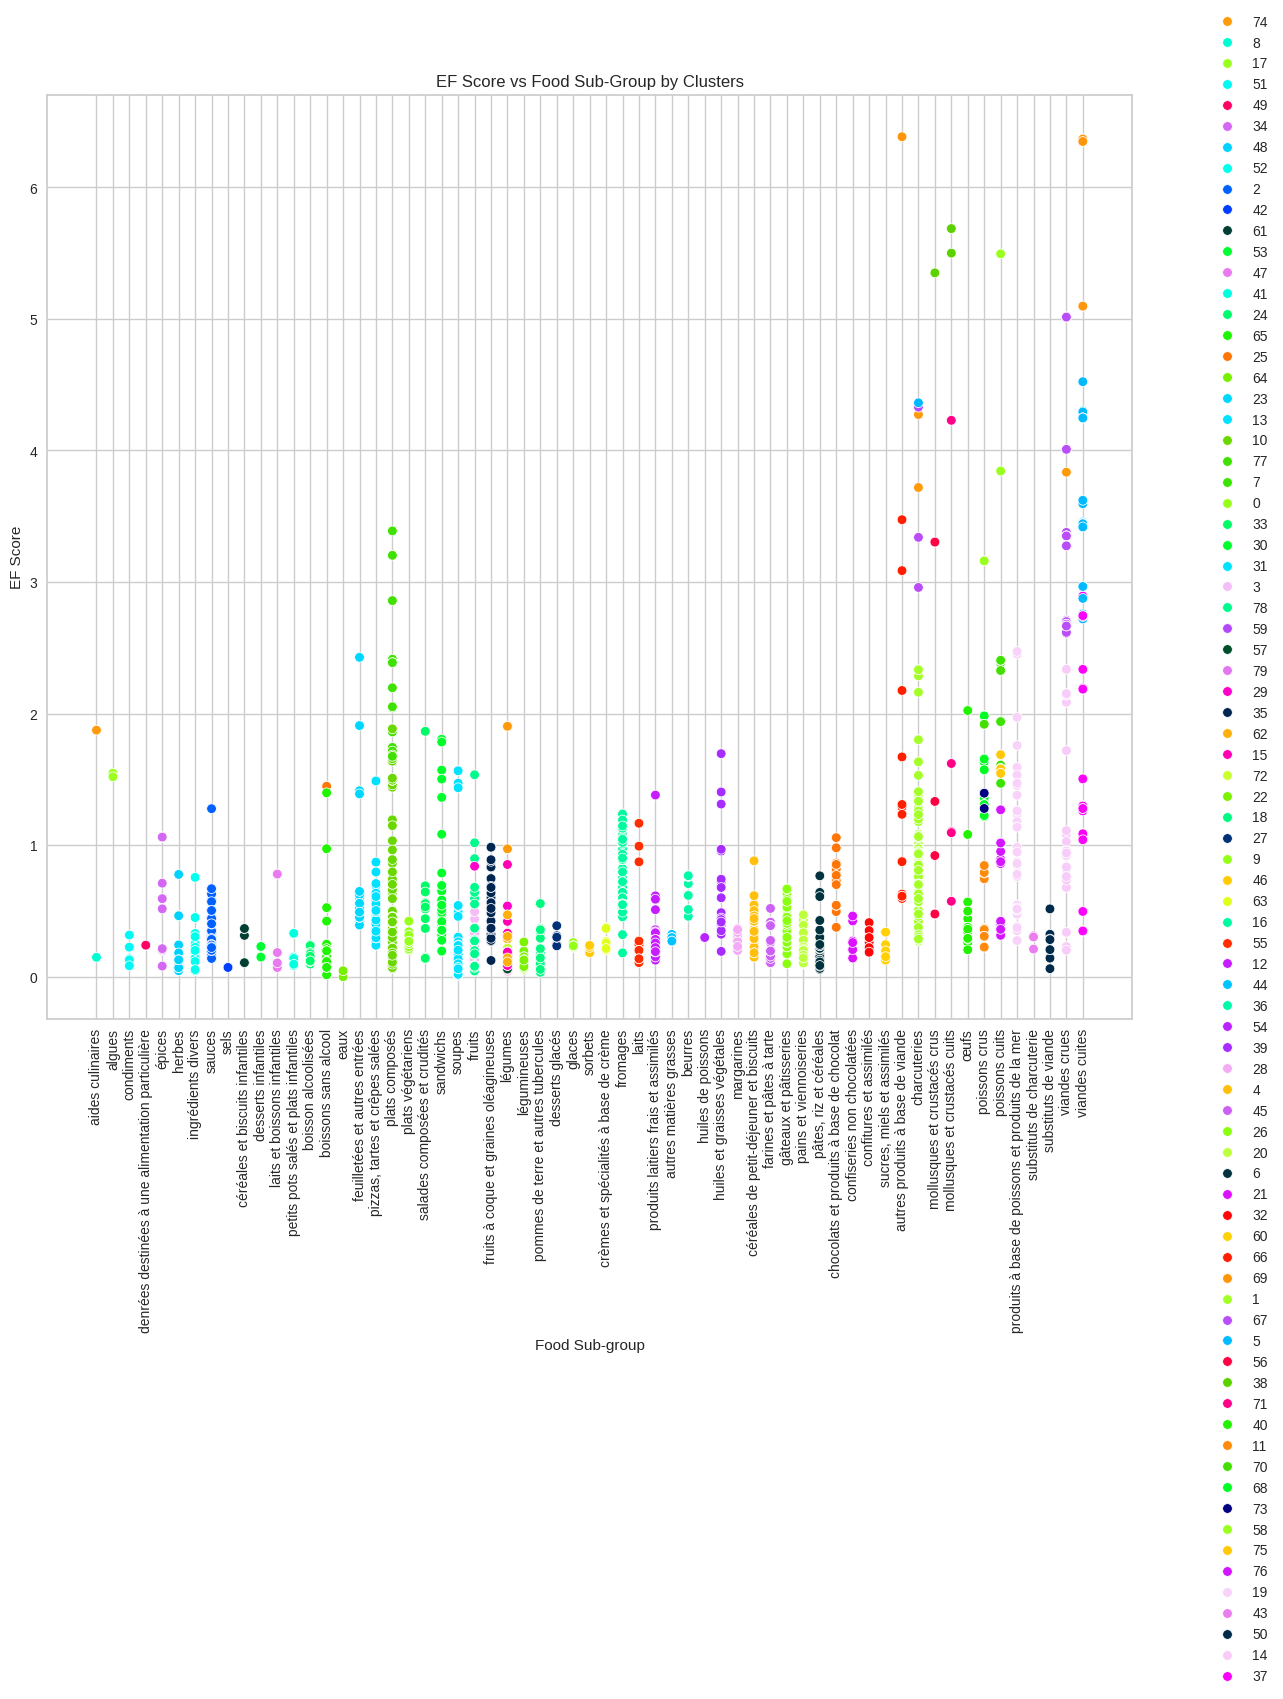

In [23]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 80) 
palette = [cmap(i) for i in range(80)]

cmap = plt.cm.get_cmap("gist_ncar", 80 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 80, replace=False) 
palette = [cmap(i) for i in indices]

# Create count plot
ax = sns.scatterplot(df_o, x='Food Sub-group', y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('Food Sub-group')
ax.set_ylabel('EF Score')

#
ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


---
### Creating a KMeans model with 90 clusters

---

**Create intance of model**

In [121]:
kmeans = KMeans(n_clusters=90, random_state=5)

**Fit the model on the dataset**

In [122]:
kmeans.fit(X_scaled)

KMeans(n_clusters=90, random_state=5)

---
### Evaluate the value K=90 for number of cluster

---

**Add Cluster labels to the cleaned dataframe**

In [123]:
df_o['label'] = kmeans.labels_

df_o['label_str'] = kmeans.labels_.astype(str)

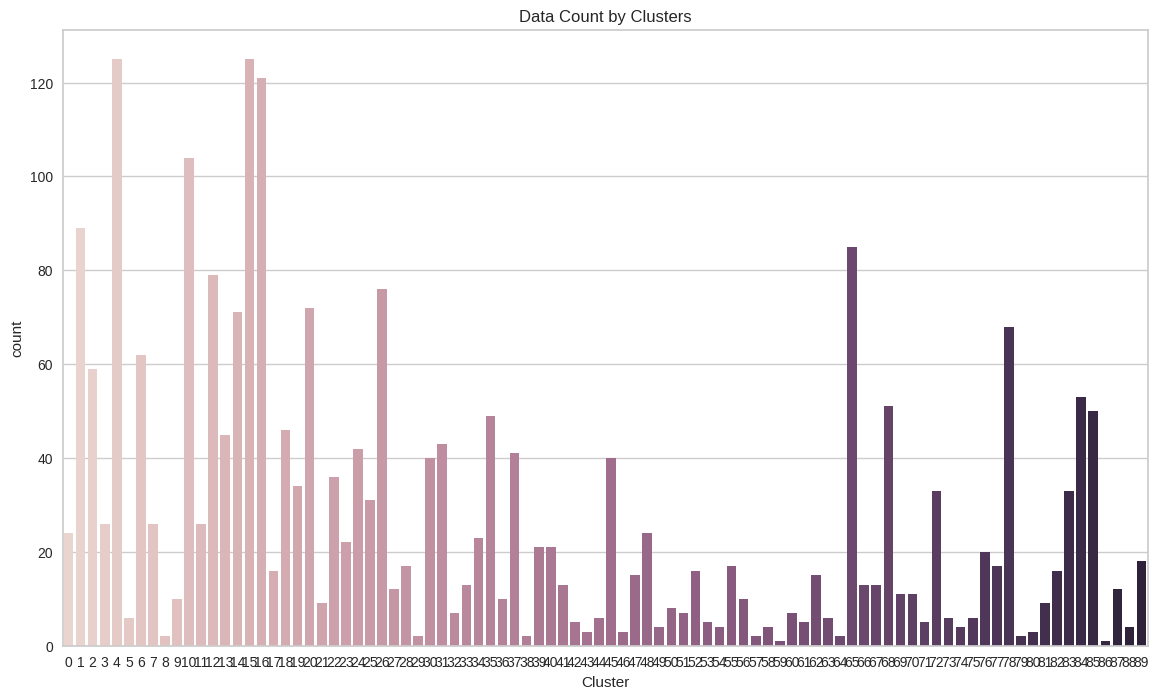

In [124]:
# Create figure and adjust size
plt.figure(figsize=(14,8))

# Create count plot
ax = sns.countplot(x=df_o['label'], hue=df_o['label'], legend=False)

# Add title
ax.set_title('Data Count by Clusters')

# Add axis labels
ax.set_xlabel('Cluster')

# Show plot
plt.show()

/tmp/ipykernel_3584329/1188535821.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 90)
/tmp/ipykernel_3584329/1188535821.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 90 * 5)  # Sample from a wider range


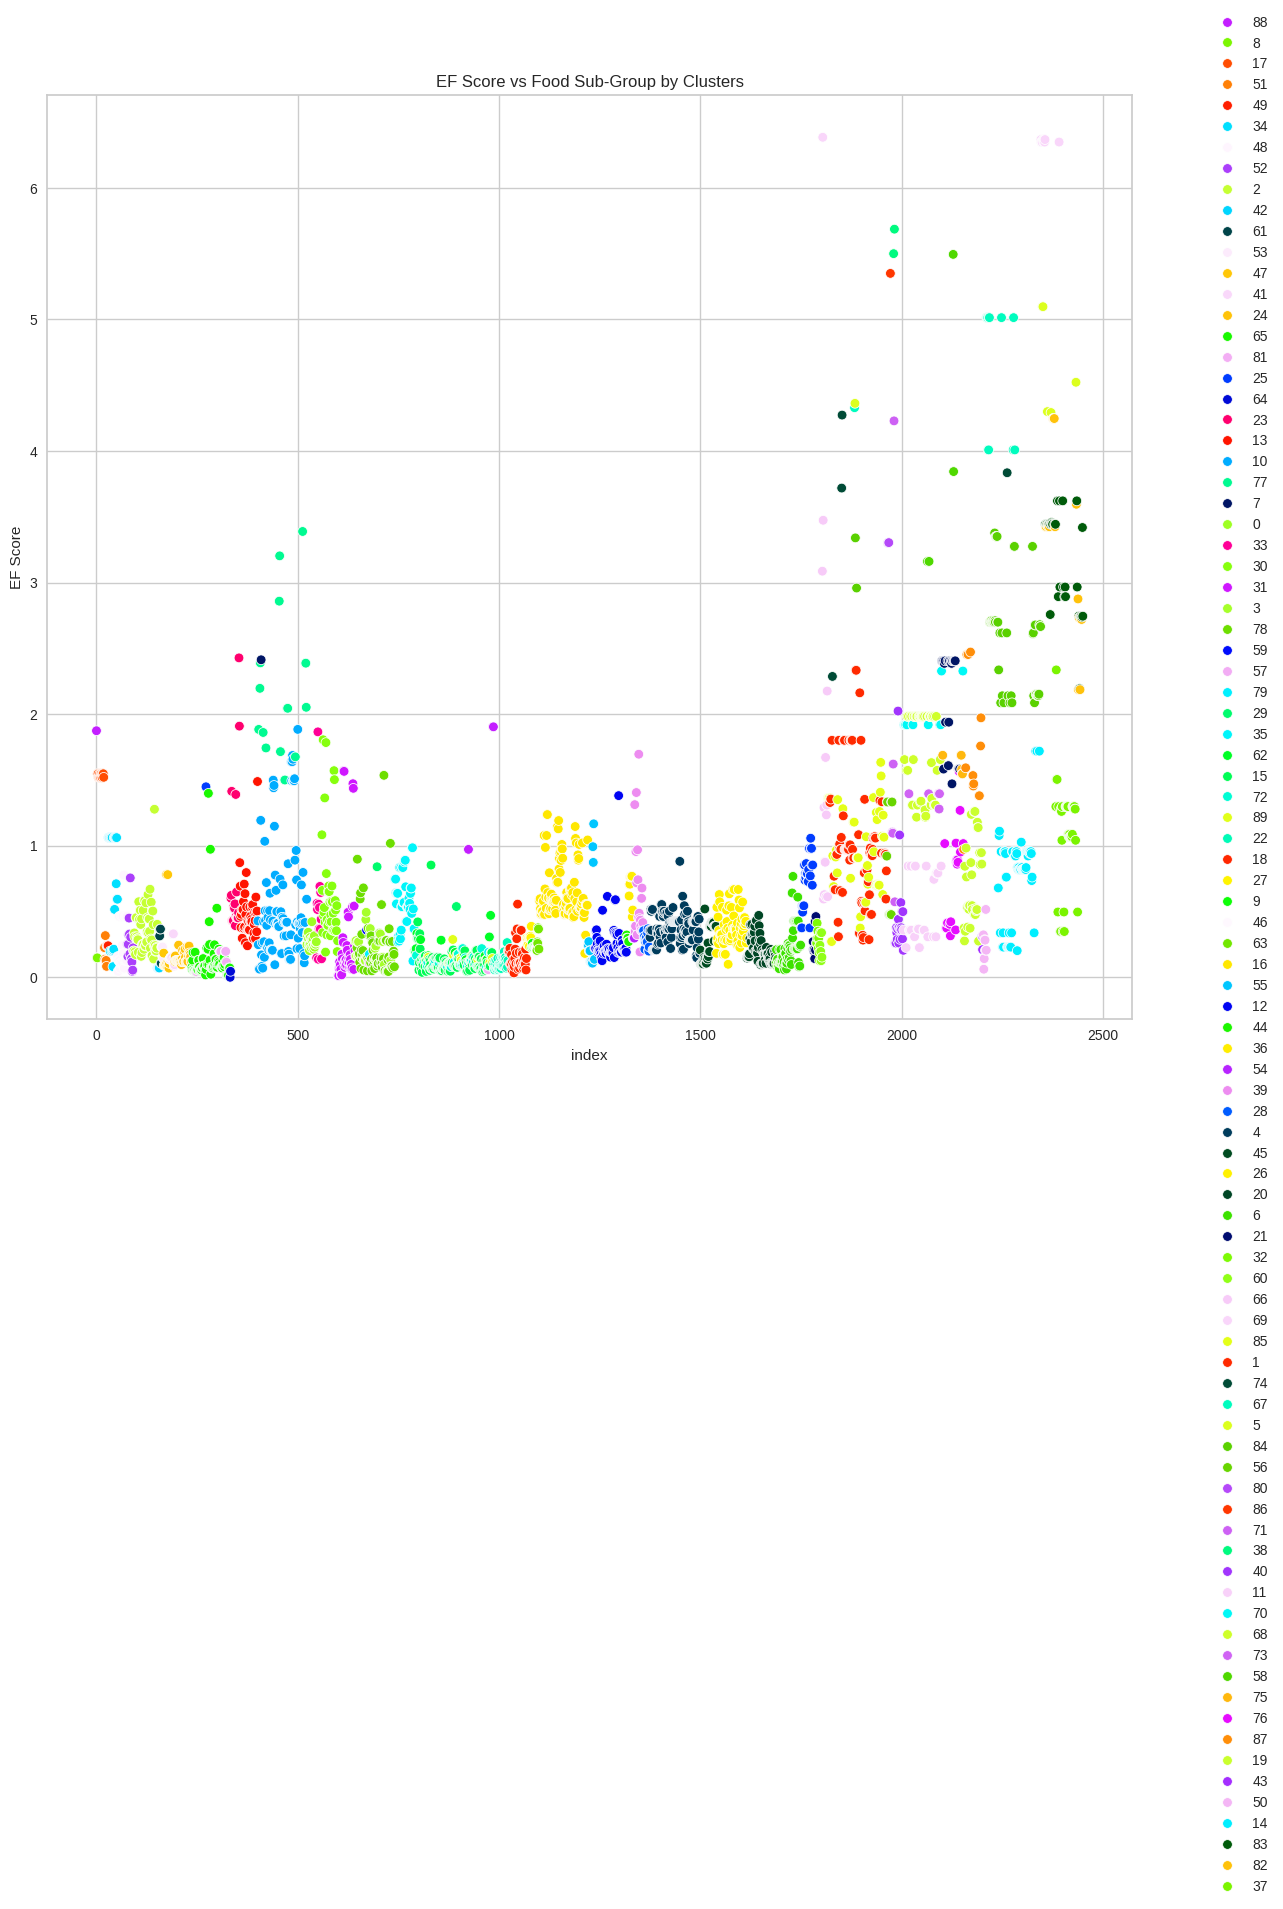

In [28]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 90) 
palette = [cmap(i) for i in range(90)]

cmap = plt.cm.get_cmap("gist_ncar", 90 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 90, replace=False) 
palette = [cmap(i) for i in indices]

# Create count plot
ax = sns.scatterplot(df_o, x=df_o.index, y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('index')
ax.set_ylabel('EF Score')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_3584329/736422139.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 90)
/tmp/ipykernel_3584329/736422139.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 90 * 5)  # Sample from a wider range
/tmp/ipykernel_3584329/736422139.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)


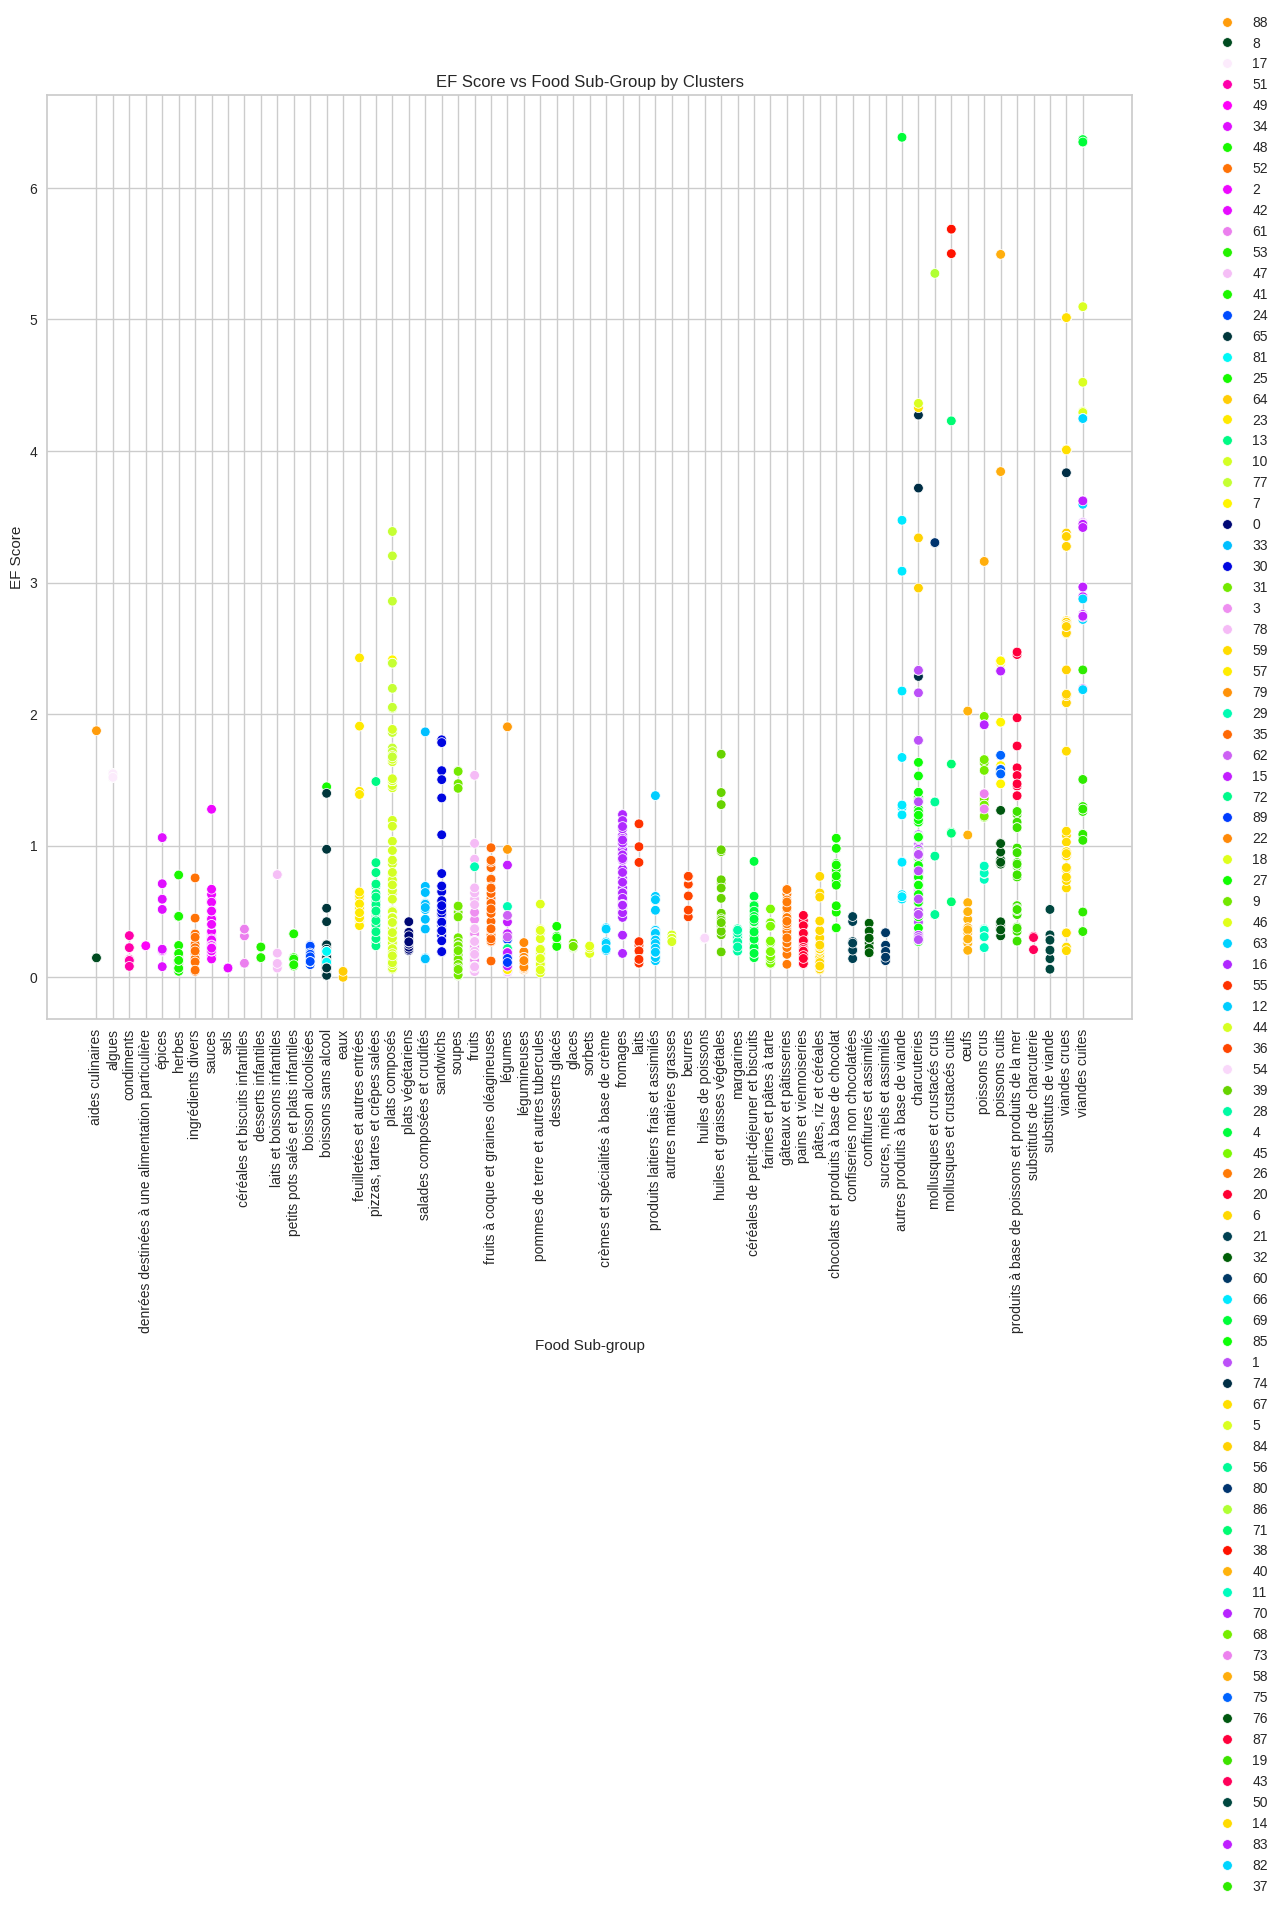

In [29]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 90) 
palette = [cmap(i) for i in range(90)]
cmap = plt.cm.get_cmap("gist_ncar", 90 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 90, replace=False) 
palette = [cmap(i) for i in indices]

# Create count plot
ax = sns.scatterplot(df_o, x='Food Sub-group', y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('Food Sub-group')
ax.set_ylabel('EF Score')

#
ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


---

<center>
    
## KMeans Model (data subset)

</center>

---

---
### Creating a KMeans model with the reduced amount of features

---

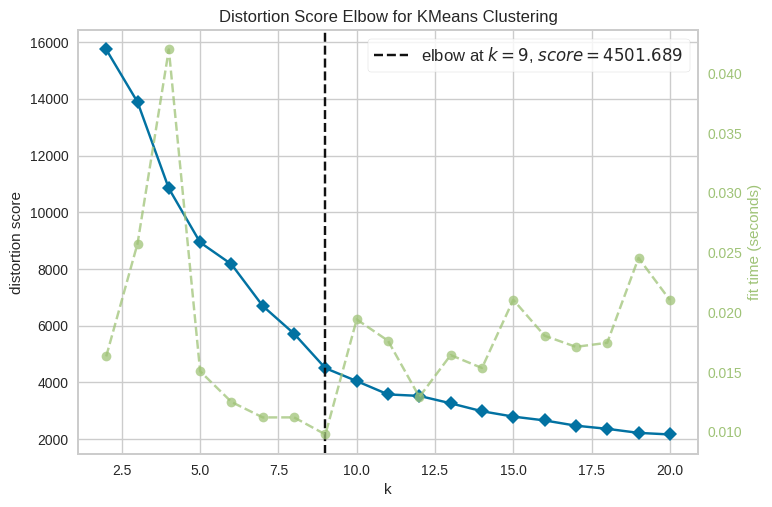

In [178]:
# Create the Elbow Visualizer for max number of 10 clusters
Elbow_M = KElbowVisualizer(KMeans(random_state=5), k=20)
Elbow_M.fit(X_sub_scaled)  # fit on PCA transformed data
Elbow_M.show();

**Create intance of model**

In [186]:
kmeans = KMeans(n_clusters=10, random_state=5)

**Fit the model on the dataset**

In [187]:
kmeans.fit(X_sub_scaled)

KMeans(n_clusters=10, random_state=5)

---
### Evaluate the value K=10 for number of cluster

---

In [198]:
palette = [
    "green",
    "magenta",
    "deepskyblue",
    "darkorchid",
    "lightpink",
    "darkorange",
    "red",
    "navy",
    "chartreuse",
    "tomato",
    "turquoise",
    "dodgerblue",
    "yellowgreen",
    "deeppink",
    "springgreen"
]

**Add Cluster labels to the cleaned dataframe**

In [188]:
df_o['label'] = kmeans.labels_

df_o['label_str'] = kmeans.labels_.astype(str)

/tmp/ipykernel_3584329/1084803089.py:5: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.countplot(x=df_o['label'], hue=df_o['label'], legend=False, palette=palette)


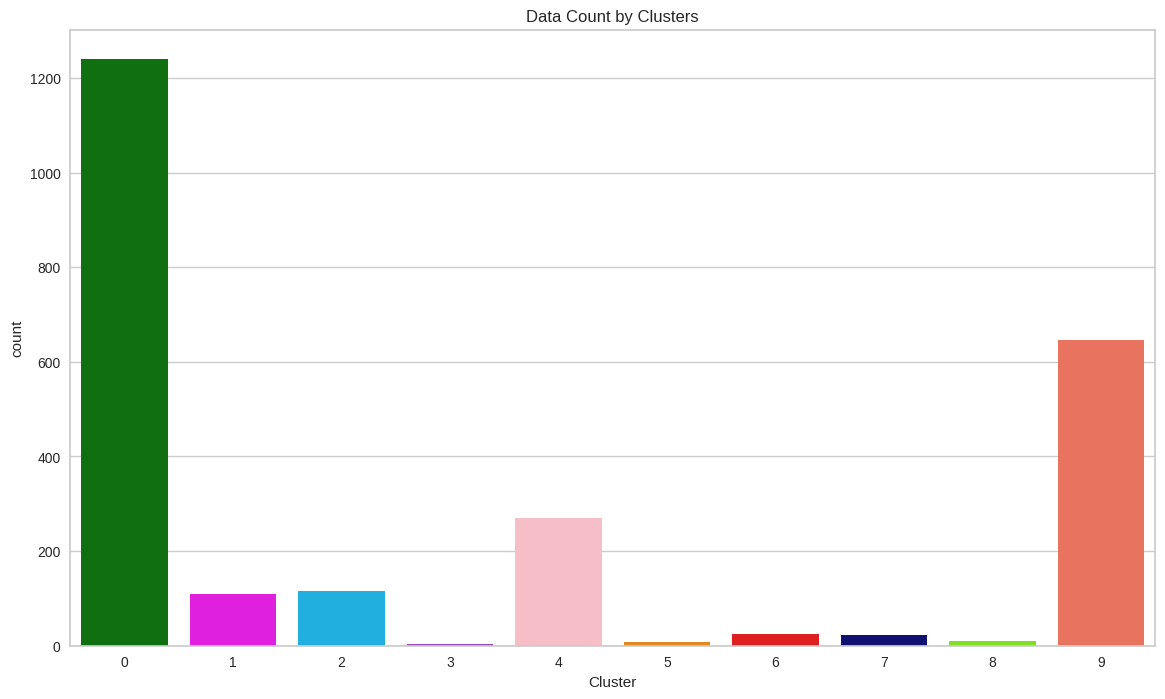

In [204]:
# Create figure and adjust size
plt.figure(figsize=(14,8))

# Create count plot
ax = sns.countplot(x=df_o['label'], hue=df_o['label'], legend=False, palette=palette)

# Add title
ax.set_title('Data Count by Clusters')

# Add axis labels
ax.set_xlabel('Cluster')

# Show plot
plt.show()

/tmp/ipykernel_3584329/1202278269.py:6: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.scatterplot(df_o, x=df_o.index, y='EF Score', hue='label_str', legend=True, palette=palette)


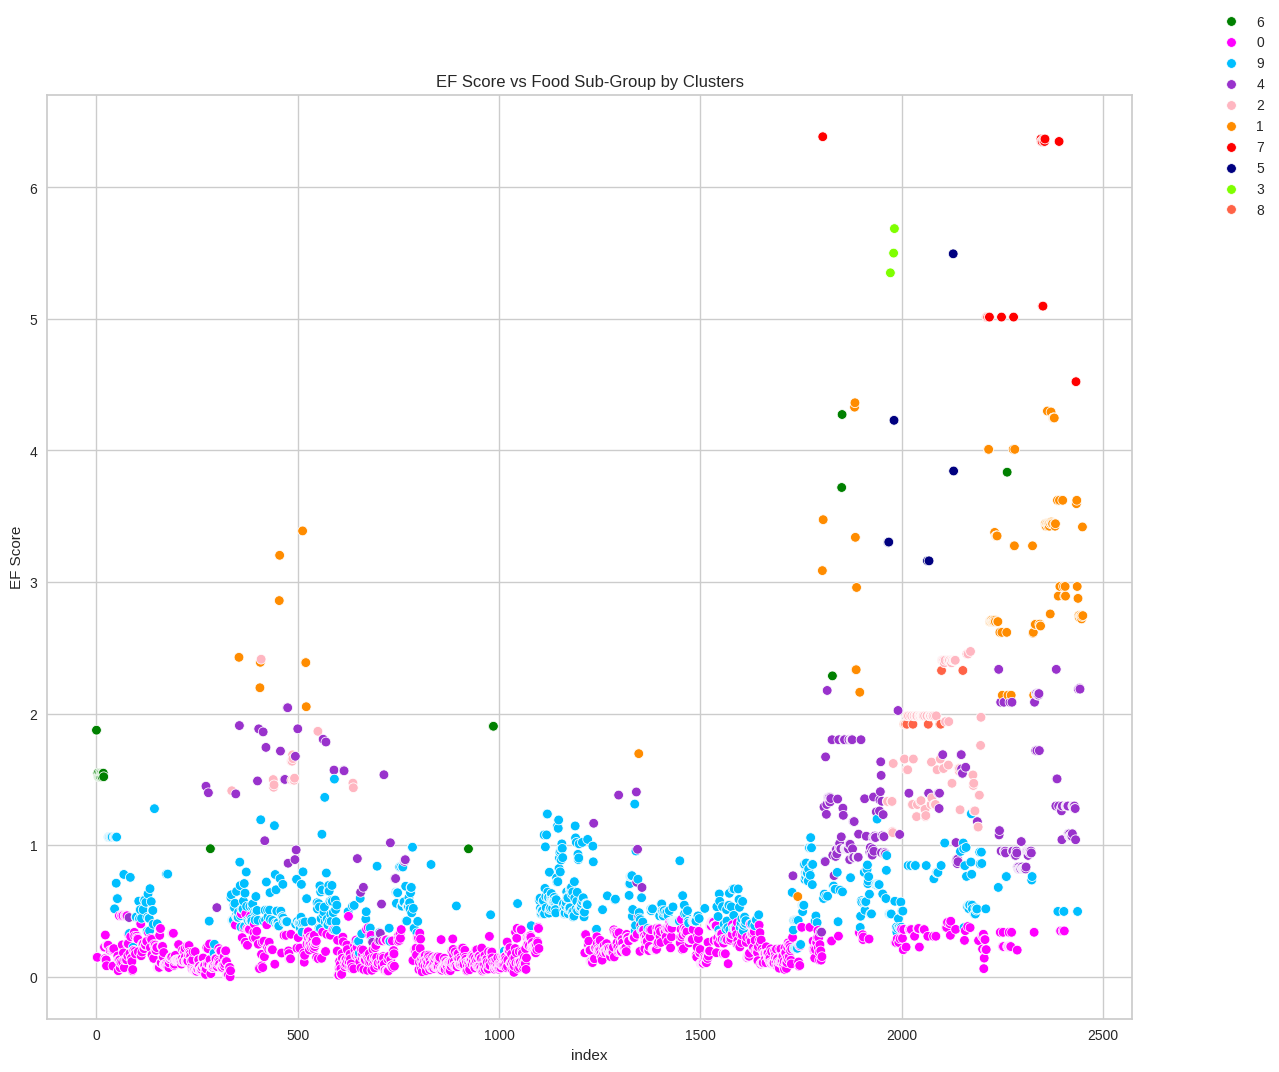

In [200]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(df_o, x=df_o.index, y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('index')
ax.set_ylabel('EF Score')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_3584329/4198580293.py:6: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.scatterplot(df_o, x='Food Sub-group', y='EF Score', hue='label_str', legend=True, palette=palette)
/tmp/ipykernel_3584329/4198580293.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)


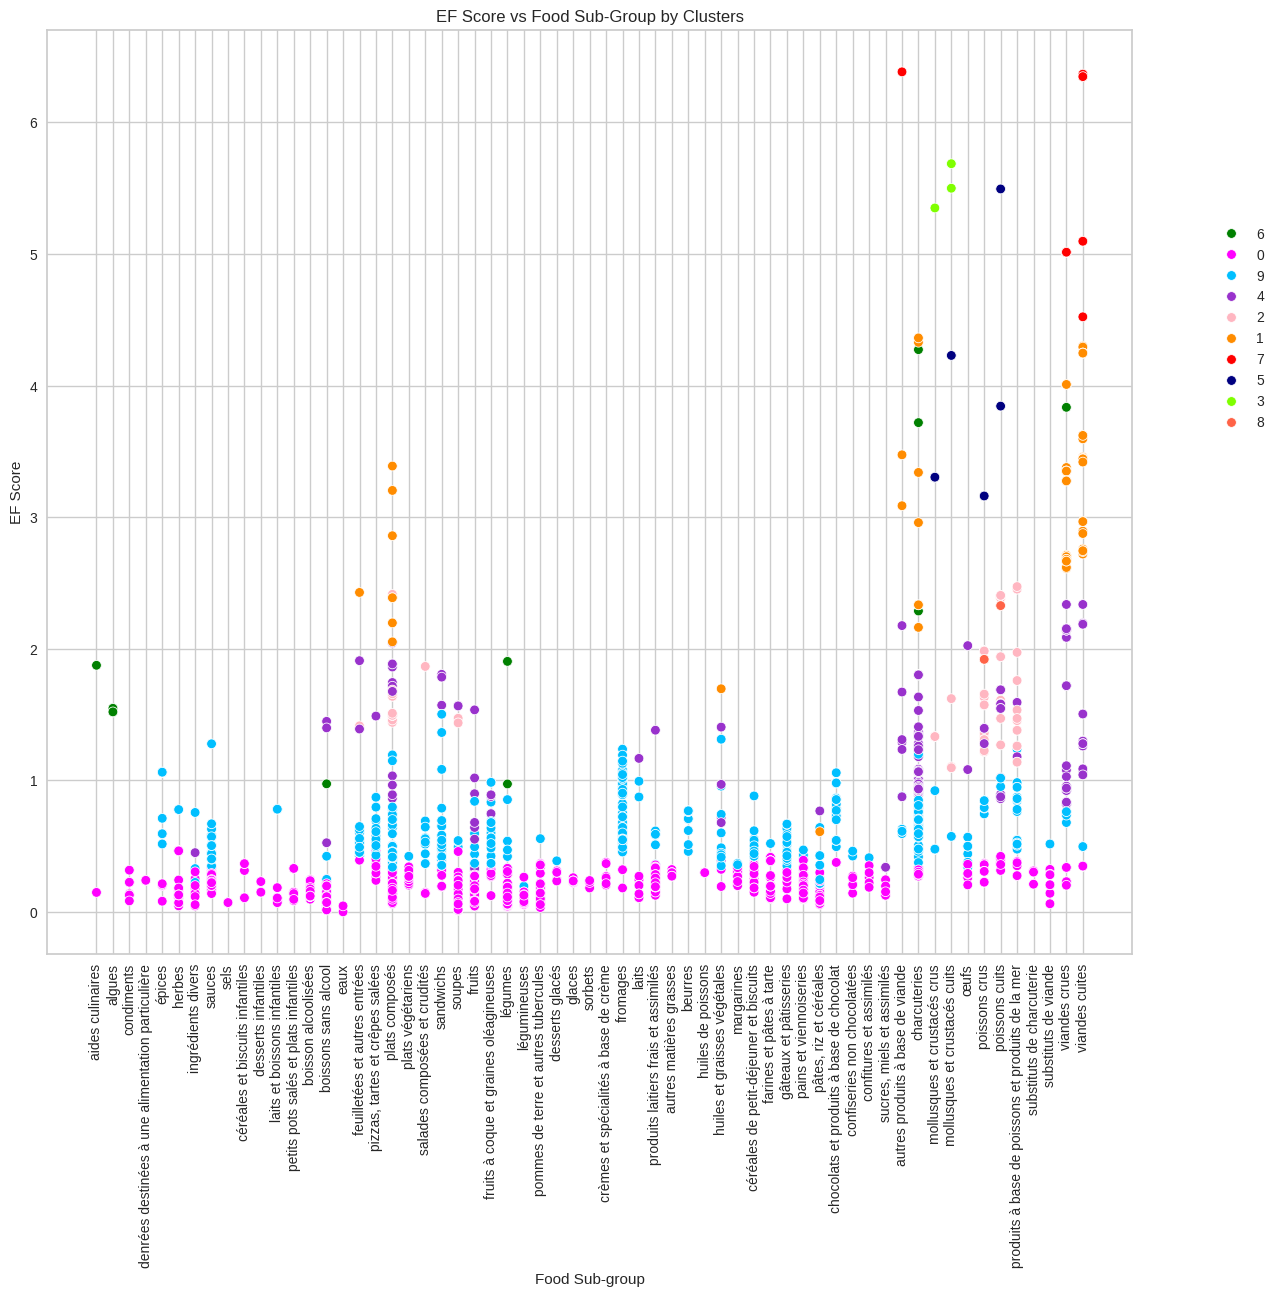

In [209]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(df_o, x='Food Sub-group', y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('Food Sub-group')
ax.set_ylabel('EF Score')

#
ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_3584329/1623807048.py:6: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.scatterplot(df_o, x='Food Group', y='EF Score', hue='label_str', legend=True, palette=palette)
/tmp/ipykernel_3584329/1623807048.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_o['Food Group'].unique(),rotation=90)


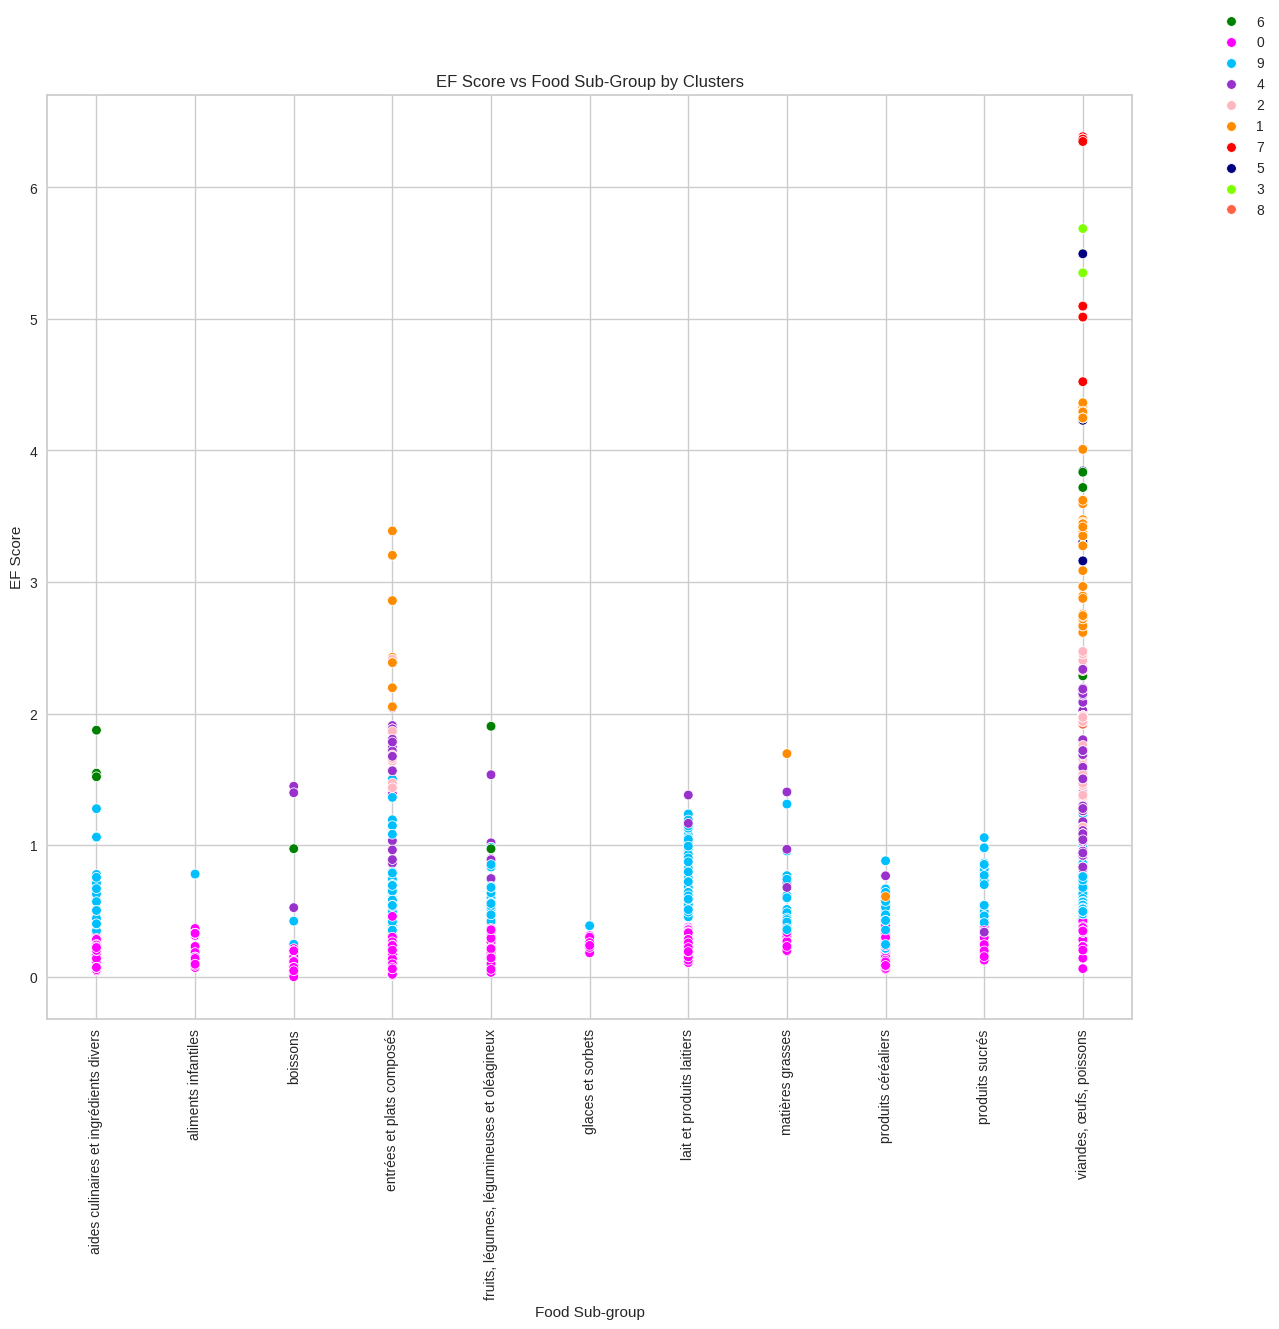

In [202]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(df_o, x='Food Group', y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('Food Sub-group')
ax.set_ylabel('EF Score')

#
ax.set_xticklabels(df_o['Food Group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


In [37]:
df_o.select_dtypes(include=['float', 'int']).groupby(['label'])['EF Score'].mean()

label
0     0.184857
1     5.149558
2     1.769620
3     2.257017
4     0.358654
5     3.724838
6     0.563992
7     2.821498
8     1.893950
9     5.512474
10    1.993583
11    1.474753
12    1.084317
Name: EF Score, dtype: float64

/tmp/ipykernel_3584329/1478915694.py:10: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.boxplot(df_o, x='label', y='EF Score', order=sorted_labels, legend=False, hue='label', palette=palette)


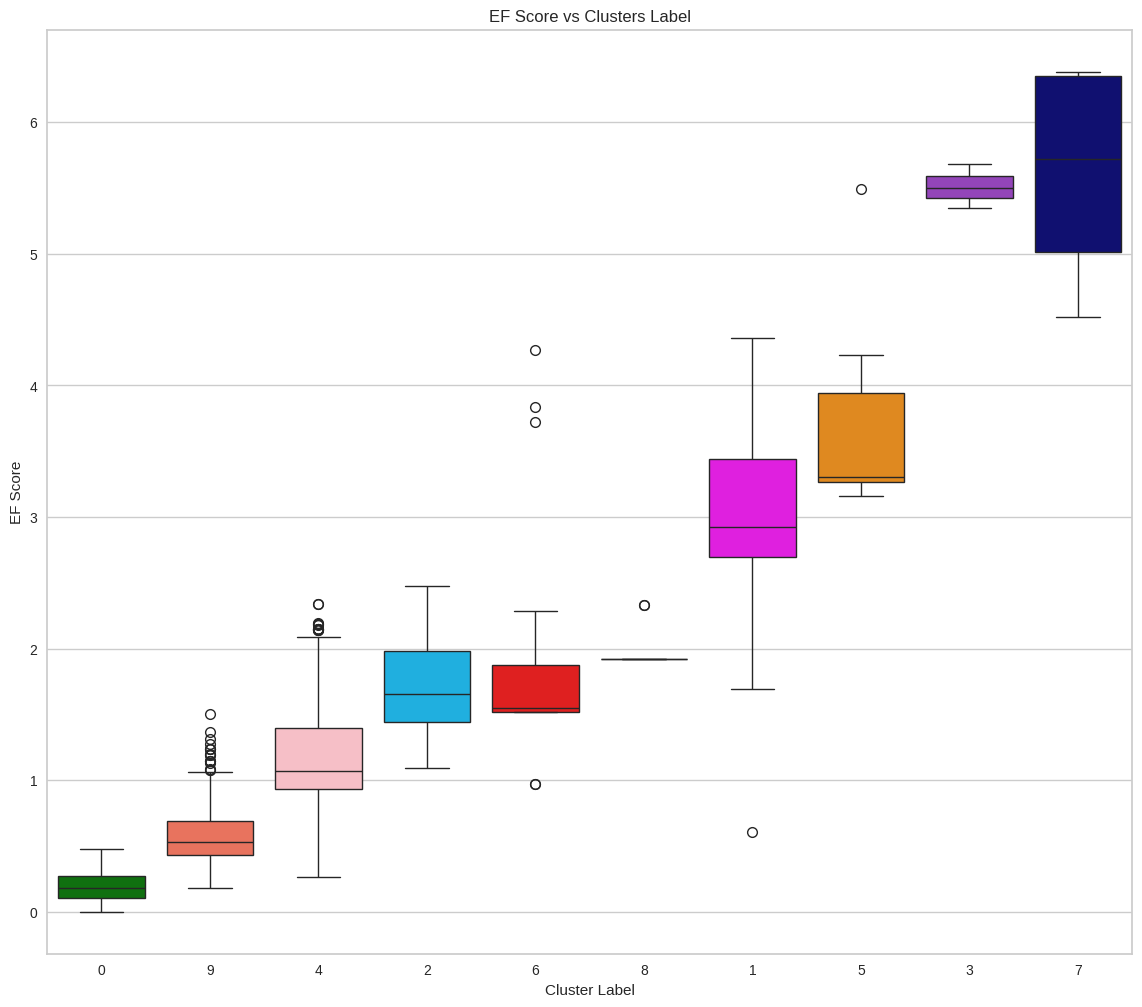

In [207]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


sorted_labels = df_o.groupby("label")["EF Score"].mean().sort_values().index



# Create count plot
ax = sns.boxplot(df_o, x='label', y='EF Score', order=sorted_labels, legend=False, hue='label', palette=palette)

# Add title
ax.set_title(f'EF Score vs Clusters Label')

# Add axis labels
ax.set_xlabel('Cluster Label')
ax.set_ylabel('EF Score')

# Save plot
plt.savefig('../graph/Clusters_Kmeans.png')

# Show plot
plt.show()


---

<center>
    
## Results

</center>

---

Using a reduced subset of dataset greatly improve the ability of the clustering algrithm to capture the key element on which to regroup the food, which is the EF Score.
